In [1]:
# Important imports
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd, numpy as np, matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge
 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

 
base = pd.DataFrame({'0':[22,28,36,43,54,59],
                  '1':[5,13,37,41,58,71]})
base

,0,1
0,22,5
1,28,13
2,36,37
3,43,41
4,54,58
5,59,71


In [2]:
scaler = MinMaxScaler()
base[base.columns] = scaler.fit_transform(base[base.columns])
base

,0,1
0,0.000000,0.000000
1,0.162162,0.121212
2,0.378378,0.484848
3,0.567568,0.545455
4,0.864865,0.803030
5,1.000000,1.000000


In [3]:
X = base.iloc[:,0]
y = base.iloc[:,1]

df = pd.DataFrame(PolynomialFeatures(5).fit_transform(sorted(X.values.reshape(-1,1))))
df['label'] = y
df

,0,1,2,3,4,5,label
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.162162,0.026297,0.004264,0.000692,0.000112,0.121212
2,1.0,0.378378,0.143170,0.054173,0.020498,0.007756,0.484848
3,1.0,0.567568,0.322133,0.182832,0.103770,0.058896,0.545455
4,1.0,0.864865,0.747991,0.646911,0.559491,0.483884,0.803030
5,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
def multi_gradient_descent(X, y, m_start=0, c=0, lrn=0.001, n_iters=25000):
    
    store = pd.DataFrame(columns= [f'm_of_{i}' for i in X.columns] + ['c', 'cost'])
    

#     m0=m1=m2=m3=m4=m5 = m_start
    ms = [{f'm{i}' : m_start} for i in X.columns]
    dic = {k:v for x in ms for k,v in x.items()}
    dic

    nos = 0
    while nos<=n_iters:

        res = []
        for i in range(len(X.columns)):
            mul = list(dic.values())[i] * X.iloc[:,i]
            res.append(mul)
        pred = sum(res) + c 
        

        m_gradients = []
        for i in range(len(X.columns)):
            grad = (sum((y - pred)*X.iloc[:,i]) * (-2/len(X)))
            m_gradients.append(grad)

        m_gradients = np.array(m_gradients)
        
        
        
        c_gradient = sum(y - pred) * (-2/len(X))



        k=0
        for i in dic.keys():
            dic[i] = dic[i] - lrn*m_gradients[k]
            k += 1
        
        
        c = c - lrn*c_gradient
        
        res = []
        for i in range(len(X.columns)):
            mul = list(dic.values())[i] * X.iloc[:,i]
            res.append(mul)
        predicted = sum(res) + c
        
        
        cost = mean_squared_error(y,predicted)
        
        store.loc[nos] = list(dic.values())+[c,cost]
        
        
        nos += 1

    return store




X = df.drop('label', axis=1)
y = df.label

obt = multi_gradient_descent(X,y,lrn=0.1,n_iters=20000)

min_cost = obt[obt.cost == obt.cost.min()]

m_overfit = np.array(min_cost.iloc[0,:-2])
c_overfit = min_cost.c.values[0]

preds_overfit = np.matmul(X, m_overfit) + c_overfit



plt.figure(figsize=(20,8))
plt.scatter(base.iloc[:,0], y, s=100, c='blue')
plt.plot(base.iloc[:,0], preds_overfit, color='red', linewidth=3)
plt.xlabel('feature', fontsize=14)
plt.ylabel('label', fontsize=14)
plt.show()

print('Cost =',mean_squared_error(y,preds_overfit))

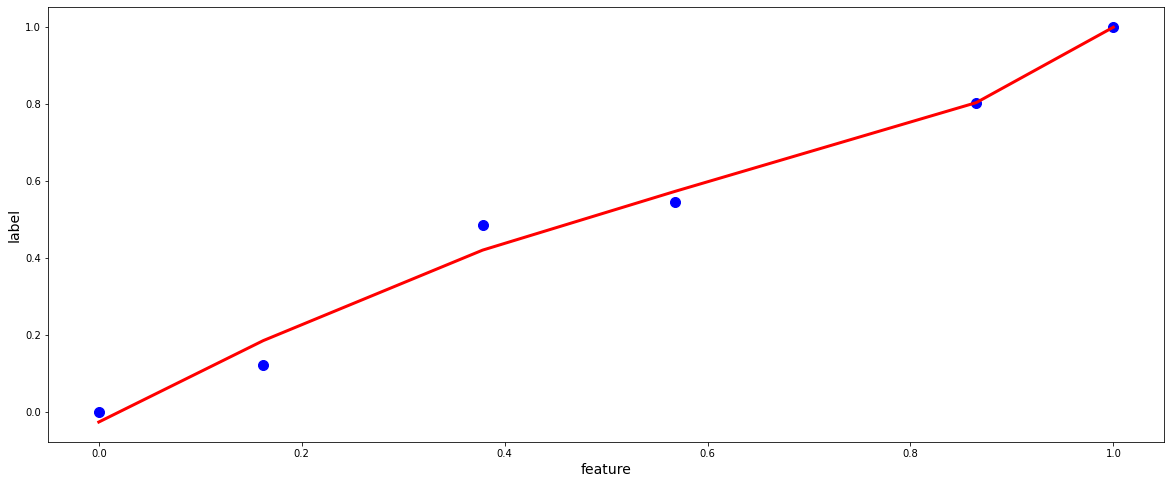

Cost = 0.001616029114420714


In [14]:
def multi_regular_gradient_descent(X, y, lamda=0.01, m_start=0, c=0, lrn=0.001, n_iters=25000):
    
    store = pd.DataFrame(columns= [f'm_of_{i}' for i in X.columns] + ['c', 'cost'])
    

    ms = [{f'm{i}' : m_start} for i in X.columns]
    dic = {k:v for x in ms for k,v in x.items()}
    dic

    nos = 0
    while nos<=n_iters:

        res = []
        for i in range(len(X.columns)):
            mul = list(dic.values())[i] * X.iloc[:,i]
            res.append(mul)
        pred = sum(res) + c
            

        m_gradients = []
        for i in range(len(X.columns)):
            abs_slopes = [abs(i) for i in list(dic.values())]
            grad = (sum((y - pred)*X.iloc[:,i]) * (-2/len(X))) + (2*lamda*abs_slopes[i])
            m_gradients.append(grad)

        m_gradients = np.array(m_gradients)
        
        
        
        c_gradient = sum(y - pred) * (-2/len(X))



        k=0
        for i in dic.keys():
            dic[i] = dic[i] - lrn*m_gradients[k]
            k += 1
        
        
        c = c - lrn*c_gradient
        
        res = []
        for i in range(len(X.columns)):
            mul = list(dic.values())[i] * X.iloc[:,i]
            res.append(mul)
        predicted = sum(res) + c
        
        
        cost = mean_squared_error(y,predicted)
        
        store.loc[nos] = list(dic.values())+[c,cost]
        
        
        nos += 1


    return store

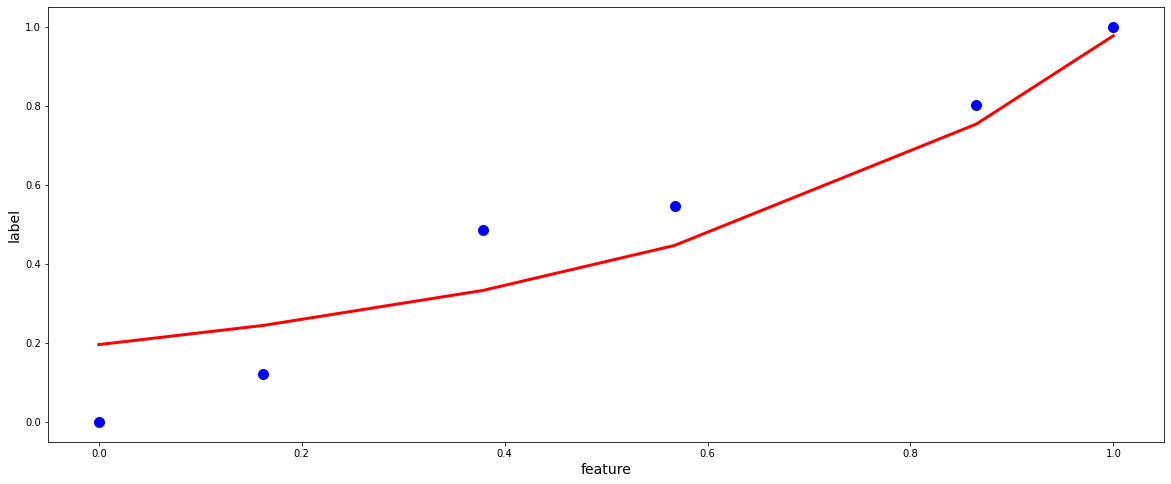

Cost = 0.014899846688863898


In [11]:
X = df.drop('label', axis=1)
y = df.label

obt = multi_regular_gradient_descent(X,y,lamda=0.1,lrn=0.1,n_iters=20000)

min_cost = obt[obt.cost == obt.cost.min()]

m_regular = np.array(min_cost.iloc[0,:-2])
c_regular = min_cost.c.values[0]

preds_regular = np.matmul(X, m_regular) + c_regular



plt.figure(figsize=(20,8))
plt.scatter(base.iloc[:,0], y, s=100, c='blue')
plt.plot(base.iloc[:,0], preds_regular, color='red', linewidth=3)
plt.xlabel('feature', fontsize=14)
plt.ylabel('label', fontsize=14)
plt.show()

print('Cost =',mean_squared_error(y,preds_regular))

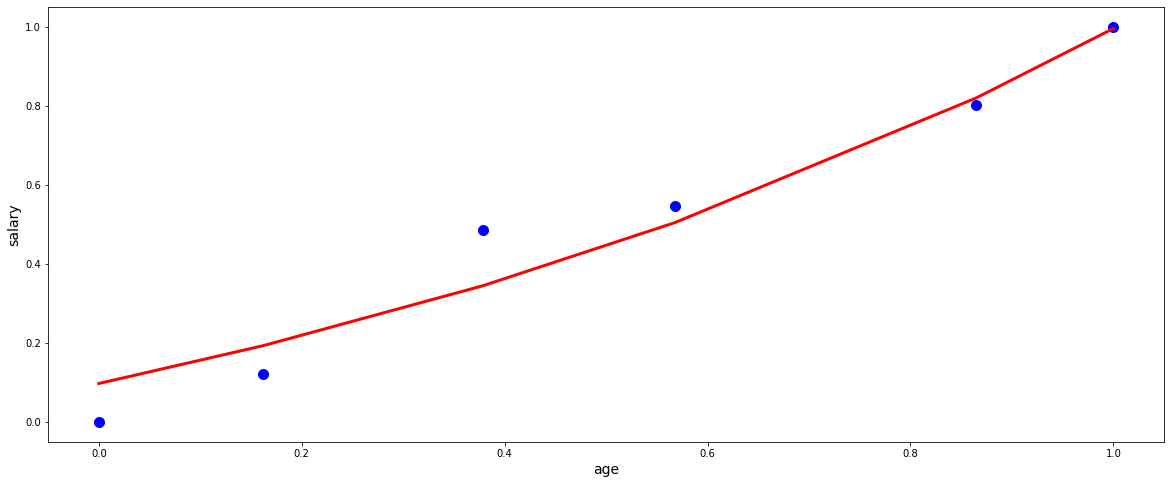

Cost = 0.006060861605174305


In [8]:
lr = Ridge(alpha=0.1).fit(X,y)
preds_lr = lr.predict(X)

plt.figure(figsize=(20,8))
plt.scatter(base.iloc[:,0], y, s=100, c='blue')
plt.plot(base.iloc[:,0], preds_lr, color='red', linewidth=3)
plt.xlabel('age', fontsize=14)
plt.ylabel('salary', fontsize=14)
plt.show()

print('Cost =',mean_squared_error(y,preds_lr))

In [9]:
# for i in [0.07,0.08,0.09,0.1]:
#     obt = multi_gradient_descent(X,y,lrn=i,n_iters=25000)

#     min_cost = obt[obt.cost == obt.cost.min()]

#     m = np.array(min_cost.iloc[0,:-2])
#     c = min_cost.c.values[0]

#     preds = np.matmul(X, m) + c



#     plt.figure(figsize=(20,8))
#     plt.scatter(base.iloc[:,0], y, s=100, c='blue')
#     plt.plot(base.iloc[:,0], preds, color='red', linewidth=3)
#     plt.xlabel('feature', fontsize=14)
#     plt.ylabel('label', fontsize=14)
#     plt.show()

#     print('Cost =',mean_squared_error(y,preds))